<a href="https://colab.research.google.com/github/shirin6767saleh/code-/blob/Fnew/F%204mplus1odd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let $F$ denote a discrete Fourier

*   List item
*   List item

Let \( F \) be the discrete Fourier transform (DFT) operator, which satisfies the following algebraic properties:

\begin{align*}
F^2 &= 1\oplus J_{n-1}, \\
F^4 &= I,
\end{align*}

where:

-  $J$ is the antidiagonal matrix,
-  $I$ is the identity matrix of appropriate dimension.

In [10]:
import numpy as np
from numpy.linalg import norm
from scipy.linalg import block_diag

# === Parameters ===
m = 50
N = 4 * m + 1
pi = np.pi
w = np.exp(-2j * pi / N)

# === Construct Identity and Symmetry Matrix ===
I = np.eye(N)
J_N = np.fliplr(np.eye(N, dtype=int))  # Reflection operator
J_N_1 = np.fliplr(np.eye(N - 1, dtype=int))
direct_sum_matrix = block_diag(1, J_N_1)
# === Construct  Matrix ّ ===
F = np.zeros((N, N), dtype=complex)
for k in range(N):
    F[k] = np.sqrt(1 / N) * np.array([
        w ** ((k ) * (l )) for l in range(N)
    ])

# === Matrix Powers ===
F2 = np.linalg.matrix_power(F, 2)
F4 = np.linalg.matrix_power(F, 4)
F3 = np.linalg.matrix_power(F,3)
F_H = np.conj(F).T
# === Identity Verification ===
print("\n--- Algebraic Identity Checks ---")

if np.allclose(F2, direct_sum_matrix, atol=1e-10):
    print("✅ F² = direct_sum_matrix")
else:
    print("❌ F² ≠ direct_sum_matrix")

if np.allclose(F3, F_H, atol=1e-10):
    print("✅ F³ = F_H confirmed")
else:
    print("❌ F³ ≠ F_H")

if np.allclose(F4, I, atol=1e-10):
    print("✅ F⁴ = I confirmed")
else:
    print("❌ F⁴ ≠ I")

print("----------------------------------\n")




--- Algebraic Identity Checks ---
✅ F² = direct_sum_matrix
✅ F³ = F_H confirmed
✅ F⁴ = I confirmed
----------------------------------



In [11]:
FDCT = np.zeros_like(F)
FDST = np.zeros_like(F)

# === Construct FDCT and FDST ===
for k in range(N):
    FDCT[k] = (2 / np.sqrt(N)) * np.array([
        np.cos((k * l * 2 * np.pi) / N) for l in range(N)
    ])
    FDST[k] = (2 / np.sqrt(N)) * np.array([
        np.sin((k * l * 2 * np.pi) / N) for l in range(N)
    ])
# === Check the connection between FDCT and F ===

print("\n--- FDCT Connection Analysis ---")
if np.allclose(FDCT, F3 + F, atol=1e-10):
    print("✅ FDCT = F3 + F confirmed")
else:
    print("❌ FDCT ≠ F3 + F")

# === Part 1: FDCT Squared Identity ===
Square_FDCT = FDCT @ FDCT

print("\n--- FDCT Analysis ---")
if np.allclose(Square_FDCT, 2 * (I + F2), atol=1e-10):
    print("✅ FDCT² = 2·(I + F2) confirmed")
else:
    print("❌ FDCT² ≠ 2·(I + F2)")

# Eigenvalue spectrum of FDCT
eigvals_FDCT = np.unique(np.round(np.linalg.eigvals(FDCT), decimals=5))
print(f"Eigenvalues of FDCT: {eigvals_FDCT}")
print("*" * 40)


# === Check the connection between FDST and F ===

print("\n--- FDST Connection Analysis ---")
if np.allclose(FDST, 1j * (F - F3), atol=1e-10):
    print("✅ FDST = 1j * (F - F3) confirmed")
else:
    print("❌ FDST ≠ 1j * (F - F3)")


# === Part 2: FDST Squared Identity ===
Square_FDST = FDST @ FDST

print("\n--- FDST Analysis ---")
if np.allclose(Square_FDST, 2 * (I - F2), atol=1e-10):
    print("✅ FDST² = 2·(I - F2) confirmed")
else:
    print("❌ FDST² ≠ 2·(I + F2)")

# Eigenvalue spectrum of FDST
eigvals_FDST = np.unique(np.round(np.linalg.eigvals(FDST), decimals=5))
print(f"Eigenvalues of FDST: {eigvals_FDST}")
print("*" * 40)





--- FDCT Connection Analysis ---
✅ FDCT = F3 + F confirmed

--- FDCT Analysis ---
✅ FDCT² = 2·(I + F2) confirmed
Eigenvalues of FDCT: [-2.+0.j -0.+0.j  2.+0.j]
****************************************

--- FDST Connection Analysis ---
✅ FDST = 1j * (F - F3) confirmed

--- FDST Analysis ---
✅ FDST² = 2·(I - F2) confirmed
Eigenvalues of FDST: [-2.-0.j  0.-0.j  2.+0.j]
****************************************


In [12]:
# === Construct FDCT and FDST ===
FDCT = np.zeros_like(F)
FDST = np.zeros_like(F)
for k in range(N):
    FDCT[k] = (2/np.sqrt(N)) * np.array([
        np.cos((k*l*2*np.pi)/N) for l in range(N)
    ])
    FDST[k] = (2/np.sqrt(N)) * np.array([
        np.sin((k*l*2*np.pi)/N) for l in range(N)
    ])
# === Verify algebraic decomposition of F ===
check1 = np.round(F3 + F - FDCT, 2)
check2 = np.round((1j * (F - F3)) - FDST, 2)

zero_matrix = np.zeros_like(F)
print("\n--- Decomposition Verification ---")
if np.allclose(check1, zero_matrix) and np.allclose(check2, zero_matrix):
    print("✅ F3 + F = FDCT and 1j * (F - F3) = FDST confirmed")
else:
    print("❌ Decomposition mismatch detected")
print("----------------------------------")

# === Construct eigenspace components ===
Eig_pos1 = (I + direct_sum_matrix) + FDCT       # eigval +1
Eig_neg1 = (I + direct_sum_matrix) - FDCT       # eigval -1
Eig_posi = (I - direct_sum_matrix) - FDST       # eigval +i
Eig_negi = (I - direct_sum_matrix) + FDST       # eigval -i

# === Verify eigenvalue equations Fv = λv ===
print("\n--- Eigenvalue Verification ---")
def check_eigvec(eig_matrix, expected, label):
    if np.allclose(F @ eig_matrix, expected * eig_matrix, atol=1e-2):
        print(f"✅ EigVecs confirmed for eigenvalue {label}")
    else:
        print(f"❌ EigVecs failed for eigenvalue {label}")

check_eigvec(Eig_pos1,  1,   "+1")
check_eigvec(Eig_neg1, -1,   "-1")
check_eigvec(Eig_posi,  1j,  "+i")
check_eigvec(Eig_negi, -1j,  "-i")
print("----------------------------------")

# === Construct normalized projection matrices ===
Proj_pos1 = (1/4) * Eig_pos1
Proj_neg1 = (1/4) * Eig_neg1
Proj_posi = (1/4) * Eig_posi
Proj_negi = (1/4) * Eig_negi

# === Check idempotence: P^2 = P ===
print("\n--- Idempotence Checks for Projectors ---")
def check_idempotent(P, label):
    if np.allclose(P @ P, P, atol=1e-2):
        print(f"✅ Proj_{{{label}}} is idempotent")
    else:
        print(f"❌ Proj_{{{label}}} is not idempotent")

check_idempotent(Proj_pos1, "+1")
check_idempotent(Proj_neg1, "-1")
check_idempotent(Proj_posi, "+i")
check_idempotent(Proj_negi, "-i")
print("------------------------------------------\n")

# === Final identity decomposition check ===
identity_operator = Proj_pos1 + Proj_neg1 + Proj_posi + Proj_negi

print("\n--- Identity Decomposition Check ---")
if np.allclose(np.eye(N), identity_operator, atol=1e-2):
    print("✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed")
else:
    print("❌ Identity cannot be decomposed into spectral projections")
print("------------------------------------------")



--- Decomposition Verification ---
✅ F3 + F = FDCT and 1j * (F - F3) = FDST confirmed
----------------------------------

--- Eigenvalue Verification ---
✅ EigVecs confirmed for eigenvalue +1
✅ EigVecs confirmed for eigenvalue -1
✅ EigVecs confirmed for eigenvalue +i
✅ EigVecs confirmed for eigenvalue -i
----------------------------------

--- Idempotence Checks for Projectors ---
✅ Proj_{+1} is idempotent
✅ Proj_{-1} is idempotent
✅ Proj_{+i} is idempotent
✅ Proj_{-i} is idempotent
------------------------------------------


--- Identity Decomposition Check ---
✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed
------------------------------------------


In [13]:
I=np.eye(N)
#==== Selected Columns ====#
patr1_F1 = ((I + direct_sum_matrix) + FDCT) [: , 0: m - 1]
patr2_F1 = ((I + direct_sum_matrix) + FDCT) [: , 2*m][:, np.newaxis]

Eig_F_neg1 = ((I + direct_sum_matrix) - FDCT) [ : , 0: m - 1]
#part2_F_neg1 = ((I + direct_sum_matrix) - FDCT) [ : , 2*m][:, np.newaxis]

Eig_F_posi= ((I - direct_sum_matrix) - FDST) [: , 1:m]

Eig_F_negi= ((I - direct_sum_matrix) + FDST) [ : , 1:m]
# === merged columns === #
Eig_F1 = np.hstack([patr1_F1, patr2_F1])
#Eig_F_neg1 = np.hstack([part1_F_neg1,part2_F_neg1])


print("\n\033[94m--- Eigenvector Checks for F ---\033[0m")

# === Check F·v = λ·v for each set ===
if np.allclose(F @ Eig_F1, Eig_F1, atol=1e-2):
    print("✅ Eig_F1 is an eigenbasis of F for λ = +1")
else:
    print("❌ Eig_F1 is not an eigenbasis for λ = +1")

if np.allclose(F @ Eig_F_neg1, -Eig_F_neg1, atol=1e-2):
    print("✅ Eig_F_neg1 is an eigenbasis of F for λ = -1")
else:
    print("❌ Eig_F_neg1 is not an eigenbasis for λ = -1")

if np.allclose(F @ Eig_F_posi, 1j * Eig_F_posi, atol=1e-2):
    print("✅ Eig_F_posi is an eigenbasis of F for λ = +i")
else:
    print("❌ Eig_F_posi is not an eigenbasis for λ = +i")

if np.allclose(F @ Eig_F_negi, -1j * Eig_F_negi, atol=1e-2):
    print("✅ Eig_F_negi is an eigenbasis of F for λ = -i")
else:
    print("❌ Eig_F_negi is not an eigenbasis for λ = -i")

print("\033[90m" + "-"*45 + "\033[0m")





--- Eigenvector Checks for F ---
✅ Eig_F1 is an eigenbasis of F for λ = +1
✅ Eig_F_neg1 is an eigenbasis of F for λ = -1
✅ Eig_F_posi is an eigenbasis of F for λ = +i
✅ Eig_F_negi is an eigenbasis of F for λ = -i
---------------------------------------------


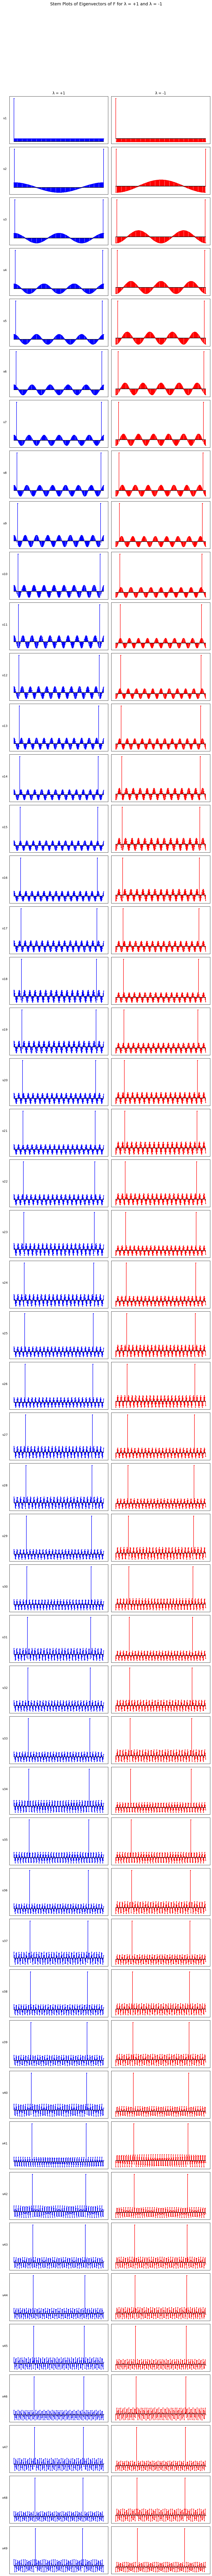

In [18]:
import matplotlib.pyplot as plt
# === Stem Plot of Eigenvectors (λ = ±1) ===
num_vectors_F1 = Eig_F1.shape[1]
num_vectors_F_neg1 = Eig_F_neg1.shape[1]
num_vectors = min(num_vectors_F1, num_vectors_F_neg1) # Use the minimum number of columns
x = np.arange(Eig_F1.shape[0])

fig, axs = plt.subplots(nrows=num_vectors, ncols=2, figsize=(10, 2.5 * num_vectors), sharex=True)
fig.suptitle("Stem Plots of Eigenvectors of F for λ = +1 and λ = -1", fontsize=14)

for i in range(num_vectors):
    # λ = +1 eigenvector (blue)
    markerline1, stemlines1, baseline1 = axs[i, 0].stem(x, np.real(Eig_F1[:, i]), linefmt='b-', markerfmt='bo', basefmt='k-')
    markerline1.set_markersize(2)
    axs[i, 0].set_ylabel(f"v{i+1}", rotation=0, labelpad=15)
    axs[i, 0].set_xticks([])
    axs[i, 0].set_yticks([])
    axs[i, 0].grid(True)

    # λ = -1 eigenvector (red)
    markerline2, stemlines2, baseline2 = axs[i, 1].stem(x, np.real(Eig_F_neg1[:, i]), linefmt='r-', markerfmt='ro', basefmt='k-')
    markerline2.set_markersize(2)
    axs[i, 1].set_xticks([])
    axs[i, 1].set_yticks([])
    axs[i, 1].grid(True)

# Column headers
axs[0, 0].set_title("λ = +1", fontsize=12)
axs[0, 1].set_title("λ = -1", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [15]:
# Block Forms of FDCT and FDST for Even-Length Signals
# The Square of FDCT and FDST
# Eigvals of FDCT and FDST
# Odd Case

In [16]:
# === FDST generation (assuming FDST is defined similarly) === #
S_odd = np.zeros((2 * m, 2 * m))
FDST = np.zeros((N, N))

for k in range(1, 2 * m + 1):
    for l in range(1, 2 * m + 1):
        S_odd[k - 1, l - 1] = (2 / np.sqrt(N)) * np.sin((2 * np.pi * k * l) / N)

for k in range(1, N + 1):
    for l in range(1, N + 1):
        FDST[k - 1, l - 1] = (2 / np.sqrt(N)) * np.sin((2 * np.pi * (k - 1) * (l - 1)) / N)

# === Extract the components for odd case === #
C_odd = np.zeros((2*m, 2*m))
for k in range(1, 2*m + 1):
    for l in range(1, 2*m + 1):
        C_odd[k-1, l-1] = np.cos((2 * np.pi * k * l) / N)

FDCT = np.zeros((N, N))
for k in range(1, N + 1):
    for l in range(1, N + 1):
        FDCT[k-1, l-1] = np.cos((2 * np.pi * (k - 1) * (l - 1)) / N)

# === Define reflection matrix J_m === #
J_mplus1 = np.eye(2 * m)[:, ::-1]
# === Create ones vectors O1 and O2 === #
O1 = np.ones((1, N))
O2 = np.ones((2 * m, 1))
# === Construct block of recon_FDST matrix === #
H_top = np.hstack((S_odd, -S_odd @ J_mplus1))
H_bottom = np.hstack((-J_mplus1 @ S_odd, J_mplus1 @ S_odd @ J_mplus1))
H = np.vstack((H_top, H_bottom))
#=== zeros matrix===#
Z1 = np.zeros((1, H.shape[1]))
Z2 = np.zeros((H.shape[0], 1))
# === Construct final recon_FDST matrix === #

recon_FDST = np.vstack((
    np.hstack((np.array([[0]]), Z1)),
    np.hstack((Z2, H))
))
# === Construct block of recon_FDCT matrix === #

recon_FDCT_1 = np.hstack((
    O2,
    C_odd,
    C_odd @ J_mplus1
))

recon_FDCT_2 = np.hstack((
    O2,
    J_mplus1 @ C_odd,
    J_mplus1 @ C_odd @ J_mplus1
))

# === Construct final recon_FDCT matrix === #
recon_FDCT_odd = np.vstack([O1, recon_FDCT_1, recon_FDCT_2])



# === Compare reconstructions ===
print("FDCT shape:", FDCT.shape, "| C_odd shape:", C_odd.shape)
print("FDCT ≈ reconstructed FDCT?")
print("Comparison result:", np.allclose(FDCT, recon_FDCT_odd, atol=1e-2))
print("*" * 40)
print("\nrecon_FDCT_odd (reconstructed) matrix:")
print(recon_FDCT_odd)

# === Final reconstruct FDST odd === #
recon_FDST_top = np.hstack([[0], Z1[0]])
recon_FDST_bottom = np.hstack([Z2, H])
recon_FDST_odd = np.vstack([recon_FDST_top, recon_FDST_bottom])
print("FDST shape:", FDST.shape, "| S_odd shape:", S_odd.shape)
print("FDST ≈ reconstructed FDST?")
print("Comparison result:", np.allclose(FDST, recon_FDST_odd, atol=1e-2))
print("*" * 40)
print("\nrecon_FDST_odd (reconstructed) matrix:")
print(recon_FDST_odd)


FDCT shape: (201, 201) | C_odd shape: (100, 100)
FDCT ≈ reconstructed FDCT?
Comparison result: True
****************************************

recon_FDCT_odd (reconstructed) matrix:
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.99951146 0.99804631 ... 0.99560598 0.99804631 0.99951146]
 [1.         0.99804631 0.99219286 ... 0.98246254 0.99219286 0.99804631]
 ...
 [1.         0.99560598 0.98246254 ... 0.96068519 0.98246254 0.99560598]
 [1.         0.99804631 0.99219286 ... 0.98246254 0.99219286 0.99804631]
 [1.         0.99951146 0.99804631 ... 0.99560598 0.99804631 0.99951146]]
FDST shape: (201, 201) | S_odd shape: (100, 100)
FDST ≈ reconstructed FDST?
Comparison result: True
****************************************

recon_FDST_odd (reconstructed) matrix:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.00440905  0.00881379 ... -0.01320992 -0.00881379
  -0.00440905]
 [ 0.          0.00881379  0.01759315 ..

In [17]:
#=== Identity matrix===#
I_m = np.eye(2 * m)
# === Construct zebra_diff_matrix === #
diag_dominant_neg = np.ones((2*m, 2*m)) * (-1/2)
np.fill_diagonal(diag_dominant_neg, (2*m)/2 - 1/4)
# === Compute squares of C_odd and S_odd === #
C_odd_squared = C_odd @ C_odd
S_odd_squared = S_odd @ S_odd
# === Check approximations === #
print("Is C_odd^2 ≈ diag_dominant_neg?")
print(np.allclose(C_odd_squared, diag_dominant_neg, atol=1e-2))
print("Is S_odd^2 ≈ I_m?")
print(np.allclose(S_odd_squared, I_m, atol=1e-2))# Compare with identity of size m
print("*" * 40)

# === Compute eigenvalues === #
eigvals_C_odd = np.unique(np.round(np.linalg.eigvals(C_odd), 4))
eigvals_S_odd = np.unique(np.round(np.linalg.eigvals(S_odd), 4))

print("Eigenvalues of C_odd (FDCT):")
print(eigvals_C_odd)
print("*" * 40)


Is C_odd^2 ≈ diag_dominant_neg?
True
Is S_odd^2 ≈ I_m?
True
****************************************
Eigenvalues of C_odd (FDCT):
[-7.0887-0.j -0.5   +0.j  7.0887+0.j]
****************************************
